In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Apr  7 08:51:44 2025

@author: mirkos
link: https://github.com/MirkosMartins/otimizacao2025/blob/main/unidade1/cruzamentoRetas.py
"""

from itertools import combinations

retas = []

class reta:
  a = 0
  b = 0
  def __init__(self,p1,p2):
    self.ponto1 = [float(x) for x in p1.split(',')]
    self.ponto2 = [float(x) for x in p2.split(',')]

  def funcao(self):
    #print(self.ponto1,self.ponto2)
    if self.ponto2[0]==0:
      #print('ponto para encontrar B')
      self.b = self.ponto2[1]
      self.a = (-self.b)/self.ponto1[0]
    if self.b>=0:
      linha = 'f-> Y='+str(self.a)+'x+'+str(self.b)
    else:
      linha = 'f-> Y='+str(self.a)+'x'+str(self.b)
    return(linha)

def verificar_intersecao_retas(a1, b1, a2, b2):
    """
      Verifica se duas retas no formato y = ax + b se cruzam e, em caso afirmativo,
      retorna o ponto de interseção.

      Args:
        a1: Coeficiente angular da primeira reta.
        b1: Coeficiente linear da primeira reta.
        a2: Coeficiente angular da segunda reta.
        b2: Coeficiente linear da segunda reta.

      Returns:
        Uma string indicando se as retas se cruzam e, em caso afirmativo, as coordenadas
        do ponto de interseção.
      """
    if a1 != a2:
        x = (b2 - b1) / (a1 - a2)
        y = a1 * x + b1
        return f"As retas se cruzam no ponto ({x:.2f}, {y:.2f})"
    elif b1 != b2:
        return "As retas são paralelas e não se cruzam."
    else:
        return "As retas são coincidentes (são a mesma reta)."

def init():
    #print('****Init****')
    arquivo = open('input.txt')
    linhas = arquivo.readlines()
    for linha in linhas:
      p = linha.split('(')
      pontos = []
      for p1 in p:
        p1=p1.rstrip()#tira o \n
        if len(p1)>0:
          #print(p1[:len(p1)-1])
          pontos.append(p1[:len(p1)-1])
      r = reta(pontos[0],pontos[1])
      retas.append(r)#adiciona reta na lista retas
      print(r.funcao())

def teste():
    print('****TESTE****')
    combRetas = combinations(retas,2)
    for cr in combRetas:
        print(verificar_intersecao_retas(cr[0].a, cr[0].b, cr[1].a, cr[1].b))

if __name__ == '__main__':
    init()
    teste()

FileNotFoundError: [Errno 2] No such file or directory: 'input.txt'

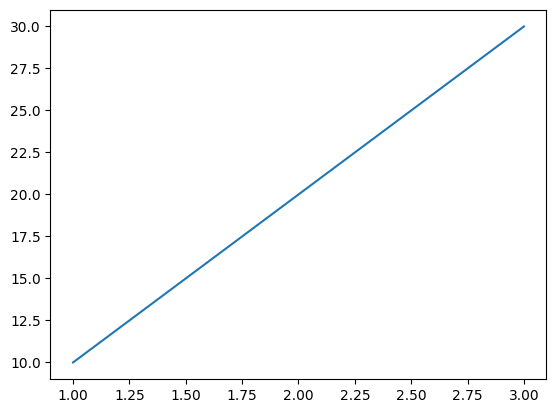

In [ ]:
#Criando um programa que gere uma reta a partir das coordenadas
#importando a classe, da forma mais usual
import matplotlib.pyplot as plt
#definindo variáveis que vamos usar nos exemplos
x = [1, 2, 3]
y = [10, 20, 30]
y2 = [15, 10, 40]
y3 = [20, 10, 35]
yBar = [3, 10, 7, 5, 3, 4.5, 6, 8.1]
z = [i * 1.5 for i in yBar]
xBar = range(len(yBar))
azul = "blue"
verde = "green"
preto = "black"

def plota_linha_1():
  plt.plot(x, y)

plota_linha_1()

In [7]:
# Importamos bibliotecas necessárias:
# matplotlib.pyplot para desenhar o gráfico
# sympy.Point e sympy.Segment para representar pontos e segmentos geometricamente
# itertools.combinations para comparar pares de segmentos
import matplotlib.pyplot as plt
from sympy import Point, Segment
import itertools

# === FUNÇÃO 1: Lê pontos do arquivo de entrada ===
def ler_pontos_do_arquivo(nome_arquivo='Input.txt'):
    """
    Lê pontos no formato (x,y) de um arquivo de texto e retorna uma lista de tuplas (x, y).
    Cada linha do arquivo deve ter exatamente um ponto, por exemplo: (3,5)
    """
    lista_de_pontos = []

    # Abre o arquivo para leitura
    with open(nome_arquivo, 'r') as arquivo:
        for linha in arquivo:
            linha = linha.strip()  # Remove espaços e quebras de linha
            if linha:
                # Remove os parênteses e separa os números pelo caractere vírgula
                linha = linha.replace('(', '').replace(')', '')
                x_str, y_str = linha.split(',')

                # Converte os valores de string para float e armazena como tupla
                ponto = (float(x_str), float(y_str))
                lista_de_pontos.append(ponto)

    return lista_de_pontos  # Retorna a lista de tuplas (x, y)


# === FUNÇÃO 2: Cria segmentos entre pontos consecutivos ===
def formar_segmentos_entre_pontos(lista_de_pontos):
    """
    Recebe uma lista de pontos (x, y) e cria segmentos entre cada par de pontos consecutivos.
    Por exemplo, se há 4 pontos, serão criados 3 segmentos: ponto0->ponto1, ponto1->ponto2, ponto2->ponto3.
    """
    segmentos = []

    for indice in range(len(lista_de_pontos) - 1):
        # Pega dois pontos consecutivos
        ponto_inicial = Point(lista_de_pontos[indice])
        ponto_final = Point(lista_de_pontos[indice + 1])

        # Cria o segmento entre eles
        segmento = Segment(ponto_inicial, ponto_final)
        segmentos.append(segmento)

    return segmentos  # Retorna a lista de objetos Segment


# === FUNÇÃO 3: Verifica interseções entre pares de segmentos ===
def encontrar_intersecoes(segmentos):
    """
    Compara todos os pares possíveis de segmentos e verifica se eles se cruzam.
    Se cruzarem, armazena os índices dos segmentos e o ponto de interseção.
    """
    intersecoes = []

    # combinations cria todos os pares possíveis de segmentos (sem repetir ou inverter)
    for (i, segmento1), (j, segmento2) in itertools.combinations(enumerate(segmentos), 2):
        resultado = segmento1.intersection(segmento2)

        # Se a interseção existe e é um ponto (não uma sobreposição completa)
        if resultado and isinstance(resultado[0], Point):
            intersecoes.append((i, j, resultado[0]))

    return intersecoes  # Retorna lista de tuplas: (índice do seg1, índice do seg2, ponto de interseção)


# === FUNÇÃO 4: Desenha o gráfico com segmentos e interseções ===
def desenhar_grafico_com_intersecoes(lista_de_pontos, segmentos, intersecoes):
    """
    Desenha o gráfico 2D com:
    - Segmentos conectando os pontos
    - Números de identificação nos segmentos
    - Pontos de interseção destacados em vermelho
    """

    # Para cada segmento, desenha uma linha azul no gráfico
    for indice, segmento in enumerate(segmentos):
        x_coords = [segmento.p1.x, segmento.p2.x]  # coordenadas X dos extremos do segmento
        y_coords = [segmento.p1.y, segmento.p2.y]  # coordenadas Y

        plt.plot(x_coords, y_coords, 'b')  # linha azul
        plt.text(x_coords[0], y_coords[0], str(indice), fontsize=9, color='gray')  # número do segmento

    # Para cada interseção encontrada, desenha um ponto vermelho e um rótulo com os índices dos segmentos
    for indice1, indice2, ponto_intersecao in intersecoes:
        plt.plot(float(ponto_intersecao.x), float(ponto_intersecao.y), 'ro')  # ponto vermelho
        plt.text(float(ponto_intersecao.x), float(ponto_intersecao.y),
                 f"{indice1}-{indice2}", fontsize=8, color='red')  # rótulo com "1-2", "0-3", etc.

    # Configurações visuais do gráfico
    plt.xlabel("Eixo X")
    plt.ylabel("Eixo Y")
    plt.title("Segmentos e Interseções no Plano XY")
    plt.grid(True)       # ativa o grid
    plt.axis('equal')    # mantém a proporção entre os eixos
    plt.tight_layout()   # evita sobreposição de elementos
    plt.show()           # exibe o gráfico na tela


# === PROGRAMA PRINCIPAL: organiza as etapas e executa ===
if __name__ == "__main__":
    # Etapa 1: Lê os pontos do arquivo
    pontos_lidos = ler_pontos_do_arquivo('Input.txt')

    # Etapa 2: Cria segmentos entre os pontos
    segmentos_formados = formar_segmentos_entre_pontos(pontos_lidos)

    # Etapa 3: Encontra interseções entre os segmentos
    intersecoes_encontradas = encontrar_intersecoes(segmentos_formados)

    # Etapa 4: Mostra no terminal as interseções encontradas
    print("Interseções encontradas entre segmentos:")
    for idx1, idx2, ponto in intersecoes_encontradas:
        print(f"Segmento {idx1} cruza com o segmento {idx2} no ponto {ponto}")

    # Etapa 5: Desenha o gráfico com os segmentos e as interseções
    desenhar_grafico_com_intersecoes(pontos_lidos, segmentos_formados, intersecoes_encontradas)


FileNotFoundError: [Errno 2] No such file or directory: 'Input.txt'